In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# common parameters
Cap=1
GK=1.44
Eleak=-54
km=7

# define gating variables
def m_inf(V):
    return 1/(1+np.exp((-40-V)/km))
def n_inf(V,Vn,kn):
    return 1/(1+np.exp((Vn-V)/kn))

# Scipy solver

## This is the code given out.  One way is to change the parameter values and view the output plots

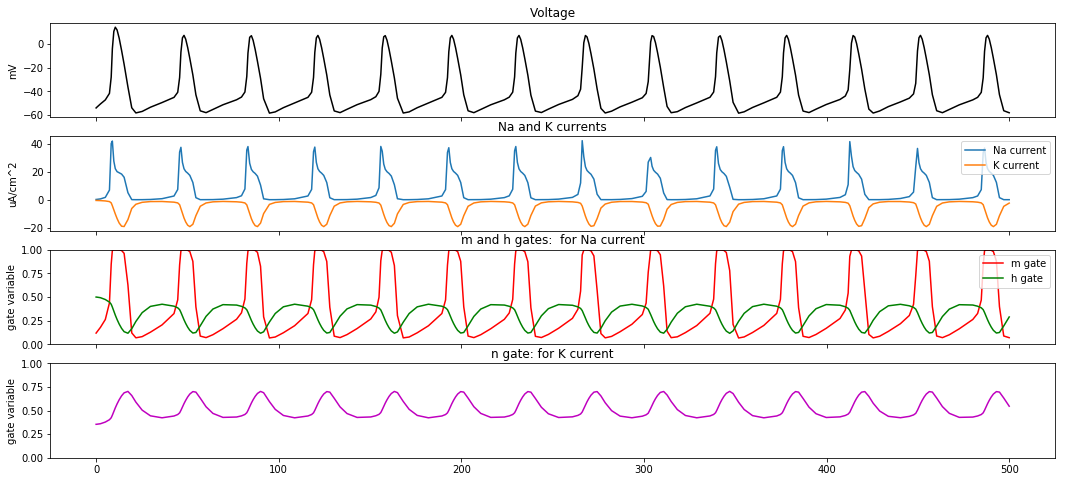

In [8]:
# simulation time
simtime=500  # in msec


paramset=1
Iinput=2
# relevant ranges:
#  paramset1:  [0 to 4.  it starts saturating above that]
#  paramset2:  same.  but this one has a sharp transition somewhere, after 2

if paramset==1:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.2,50,-77,-45,15,10
elif paramset==2:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.35,65,-90,-40,5,10
elif paramset==3:
    GNa,Gleak,ENa,EK,Vn,kn,tau = 0.25,0.012,30,-77,-44,10,50
else:
    print("wrong paramset number! \n")

    
def dV_and_dn(t,y):
    # this takes in y=[V,n], and returns [dV/dt, dn/dt]
    V=y[0]
    n=y[1]
    h=0.89-1.1*n
    INa = -GNa*m_inf(V)**3*h*(V-ENa)
    IK = -GK*(n**4)*(V-EK)
    Ileak = -Gleak*(V-Eleak)
    dVdt = 1/Cap*(INa+IK+Ileak+Iinput)
    dndt= 1/tau*(n_inf(V,Vn,kn)-n)
    return [dVdt,dndt]
    
V0=Eleak
n0=n_inf(V0,Vn,kn)
solution=solve_ivp(dV_and_dn, [0,simtime], [V0,n0])

### MAKE PLOTS of the above results

# set these, so can plot the same way as the finite difference solution
tvalues=solution.t
allV=solution.y[0]
alln=solution.y[1]

allh=0.89-1.1*alln  # can calculate this, because giving it same dynamics as the n variable
allm_inf = m_inf(allV)
allINa = -GNa*allm_inf**3*allh*(allV-ENa)
allIK = IK = -GK*alln**4*(allV-EK)
allIleak = -Gleak*(allV-Eleak)

fig,ax=plt.subplots(4,1,sharex=True)
fig.set_size_inches((18,8))
# voltage
ax[0].plot(tvalues,allV,color='k')
ax[0].set_title('Voltage')
ax[0].set_ylabel('mV')
# K and Na currents
ax[1].plot(tvalues,allINa,label='Na current')
ax[1].plot(tvalues,allIK,label='K current')
ax[1].set_title('Na and K currents')
ax[1].legend(loc="upper right") 
ax[1].set_ylabel('uA/cm^2')
# Gating variables
# m and h - for Na
ax[2].plot(tvalues,allm_inf,label='m gate',color='r')
ax[2].plot(tvalues,allh,label='h gate',color='g')
ax[2].set_title('m and h gates:  for Na current')
ax[2].legend(loc="upper right")
ax[2].set_ylabel('gate variable')
ax[2].set_ylim([0,1])
# n - for K
ax[3].plot(tvalues,alln,color='m')
ax[3].set_title('n gate: for K current')
ax[3].set_ylabel('gate variable')
ax[3].set_ylim([0,1])

plt.show()


# another way is to make an interactive object.  I'll use this, where you can manipulate the values

##  a)  Study the neuron for different constant input currents Iin of no more than a few μA/cm2. For each Iin, examine a short voltage trace At some special value of Iin, does the neurons behavior change drastically?

In [19]:


def sim_and_make_plots(simtime,paramset,Iinput):
    if paramset==1:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.2,50,-77,-45,15,10
    elif paramset==2:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.35,65,-90,-40,5,10
    elif paramset==3:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 0.25,0.012,30,-77,-44,10,50
    else:
        print("wrong paramset number! \n")


    def dV_and_dn(t,y):
        # this takes in y=[V,n], and returns [dV/dt, dn/dt]
        V=y[0]
        n=y[1]
        h=0.89-1.1*n
        INa = -GNa*m_inf(V)**3*h*(V-ENa)
        IK = -GK*(n**4)*(V-EK)
        Ileak = -Gleak*(V-Eleak)
        dVdt = 1/Cap*(INa+IK+Ileak+Iinput)
        dndt= 1/tau*(n_inf(V,Vn,kn)-n)
        return [dVdt,dndt]

    V0=Eleak
    n0=n_inf(V0,Vn,kn)
    solution=solve_ivp(dV_and_dn, [0,simtime], [V0,n0])

    ### MAKE PLOTS of the above results

    # set these, so can plot the same way as the finite difference solution
    tvalues=solution.t
    allV=solution.y[0]
    alln=solution.y[1]

    allh=0.89-1.1*alln  # can calculate this, because giving it same dynamics as the n variable
    allm_inf = m_inf(allV)
    allINa = -GNa*allm_inf**3*allh*(allV-ENa)
    allIK = IK = -GK*alln**4*(allV-EK)
    allIleak = -Gleak*(allV-Eleak)

    fig,ax=plt.subplots(4,1,sharex=True)
    fig.set_size_inches((18,8))
    # voltage
    ax[0].plot(tvalues,allV,color='k')
    ax[0].set_title('Voltage')
    ax[0].set_ylabel('mV')
    # K and Na currents
    ax[1].plot(tvalues,allINa,label='Na current')
    ax[1].plot(tvalues,allIK,label='K current')
    ax[1].set_title('Na and K currents')
    ax[1].legend(loc="upper right") 
    ax[1].set_ylabel('uA/cm^2')
    # Gating variables
    # m and h - for Na
    ax[2].plot(tvalues,allm_inf,label='m gate',color='r')
    ax[2].plot(tvalues,allh,label='h gate',color='g')
    ax[2].set_title('m and h gates:  for Na current')
    ax[2].legend(loc="upper right")
    ax[2].set_ylabel('gate variable')
    ax[2].set_ylim([0,1])
    # n - for K
    ax[3].plot(tvalues,alln,color='m')
    ax[3].set_title('n gate: for K current')
    ax[3].set_ylabel('gate variable')
    ax[3].set_ylim([0,1])
    plt.suptitle('Iinput='+str(Iinput),size=20)
    plt.show()


In [21]:
from ipywidgets import interact, IntSlider, FloatSlider
interact(sim_and_make_plots, simtime=[200,400,1000,4000], paramset=[1,2,3], 
         Iinput=FloatSlider(min=0,max=10,step=0.05,value=0))  

interactive(children=(Dropdown(description='simtime', options=(200, 400, 1000, 4000), value=200), Dropdown(des…

<function __main__.sim_and_make_plots>

# b)

 Study the response of each model neuron to small current impulses (both positive and negative deviations from a baseline current injection). For model neuron (1), use a baseline of Iin = 1.3μA/cm2, for (2) Iin = 0 and for (3) Iin = 0.5μA/cm2. Describe what happens to the voltage after a single short current injection.

Now make the pulse large enough to trigger a spike. What happens to the voltage after the spike? Does the neuron show any after-depolarization?

Study the response of the neuron to inhibitory inputs (with respect to the mean Iin above) of varying duration and amplitude. Can you get the neuron to show post- inhibitory (rebound) spiking?


To solve this one, we first need to (1) find the solution to the initial part, to deal with any transients.  Then, (2) inject the current.  After this, (3), remove the injected current and set it back to the baseline.  To do this, I did a 3-part solution, where the last time point in one part is passed in as the initial condition for the next part of the solution

In [44]:
def sim_and_make_plots(simtime,paramset,t_initial,t_pulse,Ipulse):
    if paramset==1:
        Ibase=1.3
    elif paramset==2:
        Ibase=0
    elif paramset==3:
        Ibase=0.5
    else:
        Ibase=0


    # def sim_and_make_plots(simtime,paramset,Iinput):
    if paramset==1:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.2,50,-77,-45,15,10
    elif paramset==2:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 2,0.35,65,-90,-40,5,10
    elif paramset==3:
        GNa,Gleak,ENa,EK,Vn,kn,tau = 0.25,0.012,30,-77,-44,10,50
    else:
        print("wrong paramset number! \n")

    # first, define a general function that takes in Iinput, and then use this below to define in 3 parts
    def dV_and_dn_with_Iinput(t,y,Iinput):
        # this takes in y=[V,n], and returns [dV/dt, dn/dt]
        V=y[0]
        n=y[1]
        h=0.89-1.1*n
        INa = -GNa*m_inf(V)**3*h*(V-ENa)
        IK = -GK*(n**4)*(V-EK)
        Ileak = -Gleak*(V-Eleak)
        dVdt = 1/Cap*(INa+IK+Ileak+Iinput)
        dndt= 1/tau*(n_inf(V,Vn,kn)-n)
        return [dVdt,dndt]


    # solve this in 3 parts:  (1) initial with Ibase, (2) inject current, (3) back to Ibase

    allV=np.array([])
    alln=np.array([])
    tvalues=np.array([])

    # part 1:  solution to t_initial, with Iinput=Ibase
    def dV_and_dn(t,y):  return dV_and_dn_with_Iinput(t,y,Iinput=Ibase)
    V0=Eleak
    n0=n_inf(V0,Vn,kn)
    solution=solve_ivp(dV_and_dn, [0,t_initial], [V0,n0])
    tvalues=np.concatenate((tvalues,solution.t))
    allV=np.concatenate((allV,solution.y[0]))
    alln=np.concatenate((alln,solution.y[1]))

    # part 2:  solution with injected current
    def dV_and_dn(t,y):  return dV_and_dn_with_Iinput(t,y,Iinput=Ibase+Ipulse)
    solution=solve_ivp(dV_and_dn, [t_initial,t_initial+t_pulse], [allV[-1],alln[-1]])
    tvalues=np.concatenate((tvalues,solution.t))
    allV=np.concatenate((allV,solution.y[0]))
    alln=np.concatenate((alln,solution.y[1]))

    # part 3:  set Iinput back to Ibase
    def dV_and_dn(t,y):  return dV_and_dn_with_Iinput(t,y,Iinput=Ibase)
    solution=solve_ivp(dV_and_dn, [t_initial+t_pulse,simtime], [allV[-1],alln[-1]])
    tvalues=np.concatenate((tvalues,solution.t))
    allV=np.concatenate((allV,solution.y[0]))
    alln=np.concatenate((alln,solution.y[1]))



    ### MAKE PLOTS of the above results

    allh=0.89-1.1*alln  # can calculate this, because giving it same dynamics as the n variable
    allm_inf = m_inf(allV)
    allINa = -GNa*allm_inf**3*allh*(allV-ENa)
    allIK = IK = -GK*alln**4*(allV-EK)
    allIleak = -Gleak*(allV-Eleak)

    fig,ax=plt.subplots(4,1,sharex=True)
    fig.set_size_inches((18,12))
    # voltage
    ax[0].plot(tvalues,allV,color='k')
    ax[0].plot([t_initial,t_initial+t_pulse],np.ones(2)*(Ibase+Ipulse),color='m',label='current pulse on')
    ax[0].set_title('Voltage')
    ax[0].set_ylabel('mV')
    ax[0].legend()
    # K and Na currents
    ax[1].plot(tvalues,allINa,label='Na current')
    ax[1].plot(tvalues,allIK,label='K current')
    ax[1].set_title('Na and K currents')
    ax[1].legend(loc="upper right") 
    ax[1].set_ylabel('uA/cm^2')
    # Gating variables
    # m and h - for Na
    ax[2].plot(tvalues,allm_inf,label='m gate',color='r')
    ax[2].plot(tvalues,allh,label='h gate',color='g')
    ax[2].set_title('m and h gates:  for Na current')
    ax[2].legend(loc="upper right")
    ax[2].set_ylabel('gate variable')
    ax[2].set_ylim([0,1])
    # n - for K
    ax[3].plot(tvalues,alln,color='k')
    ax[3].set_title('n gate: for K current')
    ax[3].set_ylabel('gate variable')
    ax[3].set_ylim([0,1])
    plt.suptitle('Neuron '+str(paramset)+':  '+'t_pulse='+str(t_pulse)+', I_pulse='+str(Ipulse)+', I_base='+str(Ibase),size=20)
    plt.show()


In [49]:
from ipywidgets import interact, IntSlider, FloatSlider
interact(sim_and_make_plots, simtime=[1000], paramset=[1,2,3], 
         t_initial=[400], t_pulse=FloatSlider(min=0,max=100,step=1,value=10), Ipulse=FloatSlider(min=-10,max=10,step=0.05,value=1))  

interactive(children=(Dropdown(description='simtime', options=(1000,), value=1000), Dropdown(description='para…

<function __main__.sim_and_make_plots>